# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('geo.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 4 columns):
Unnamed: 0       108806 non-null int64
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(2)
memory usage: 3.3 MB


In [5]:
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


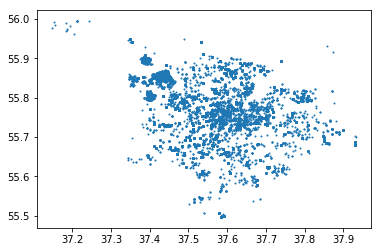

In [6]:
plt.scatter(data['x'], data['y'], s=1)

In [7]:
from sklearn.cluster import KMeans

In [8]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data[['x','y']], )
    k_inertia.append(clf_kmeans.inertia_)

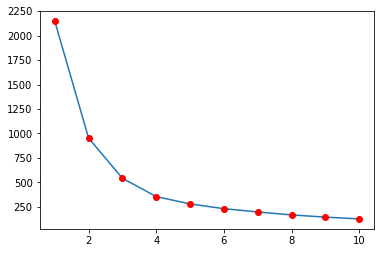

In [9]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [10]:
diff = np.diff(k_inertia)

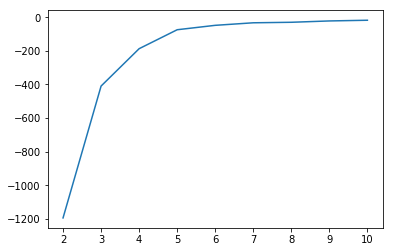

In [11]:
plt.plot(ks[1:], diff)

In [12]:
diff_r = diff[1:] / diff[:-1]

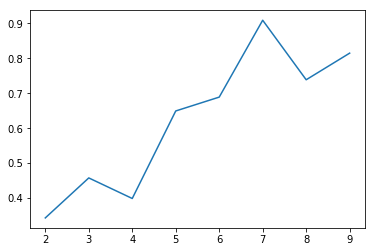

In [13]:
plt.plot(ks[1:-1], diff_r)

In [14]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

In [15]:
clusters = KMeans(n_clusters=2, random_state=0).fit_predict(data[['x','y']])

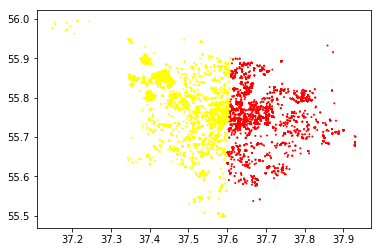

In [16]:
plt.scatter(data['x'], data['y'], c=clusters, cmap='autumn', s=1)

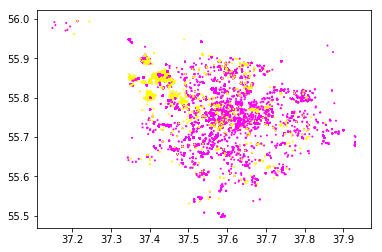

In [17]:
plt.scatter(data['x'], data['y'], c=data['comment_class'], cmap='spring', s=1)

In [18]:
data_yes=data[data['comment_class']==-1]
data_no=data[data['comment_class']==1]

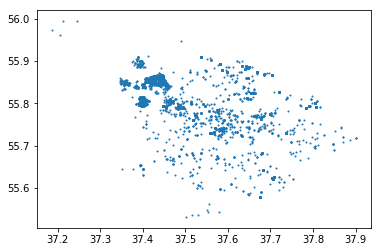

In [19]:
plt.scatter(data_no['x'], data_no['y'], cmap='spring', s=1)

In [20]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, AffinityPropagation

In [21]:
clusters_no = KMeans(n_clusters=2, random_state=0).fit_predict(data_no[['x','y']])

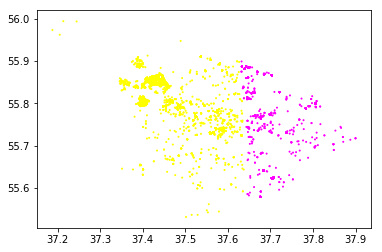

In [22]:
plt.scatter(data_no['x'], data_no['y'], c=clusters_no, cmap='spring', s=1)

In [23]:
clusters_no = AgglomerativeClustering(n_clusters=2).fit_predict(data_no[['x','y']])

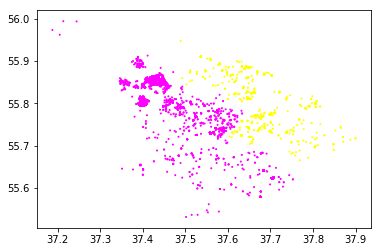

In [24]:
plt.scatter(data_no['x'], data_no['y'], c=clusters_no, cmap='spring', s=1)

In [25]:
clusters_no = DBSCAN().fit_predict(data_no[['x','y']])

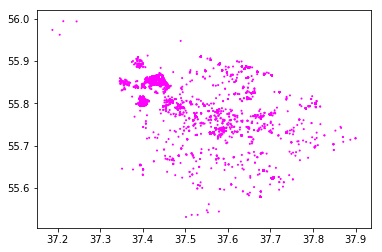

In [26]:
plt.scatter(data_no['x'], data_no['y'], c=clusters_no, cmap='spring', s=1)

AffinityPropagation убивает kernel... Как с этим бороться?

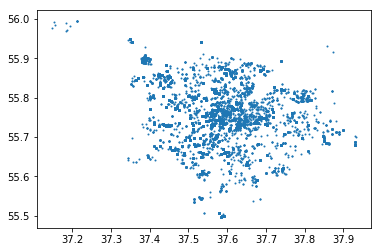

In [28]:
plt.scatter(data_yes['x'], data_yes['y'], cmap='spring', s=1)

In [34]:
clusters_yes = KMeans(n_clusters=2, random_state=0).fit_predict(data_yes[['x','y']])

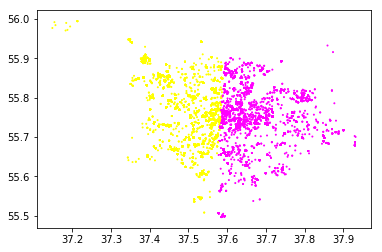

In [35]:
plt.scatter(data_yes['x'], data_yes['y'], c=clusters_yes, cmap='spring', s=1)

Все остальные методы убивают Kernel...

Не совсем поняла, в чем смфысл задания. Три раза провести класторизацию? Данные совсем похожие, кластеры получаеются одинаковыми.